In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sn

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape 

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

x_tarin for 1  : 
y_tarin for 1  :  0


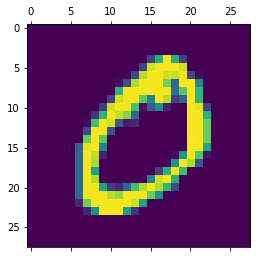

In [8]:
def mat(i):
    print('x_tarin for',i,' : ')
    plt.matshow(x_train[i])
    print('y_tarin for',i,' : ',y_train[i])
    
mat(1)    

### Convert from 2D Array to 1D Array (Flatten)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

### Creation of Neural Network

In [13]:
model = keras.Sequential([
    #28*28 input layer and 10 output without hidden layers
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 9.7623 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.1608 - accuracy: 0.8766
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7250 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5978 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4486 - accuracy: 0.8873


### Scale the input

In [14]:
# We have a data range [0-255] so we need to scale this input into a range from 0 to 1 [0-1] (x/255)
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [15]:
x_train_scaled_flattened = x_train_scaled.reshape(len(x_train_scaled),28*28)
x_test_scaled_flattened = x_test_scaled.reshape(len(x_test_scaled),28*28)

In [16]:
model = keras.Sequential([
    #28*28 input layer and 10 output without hidden layers
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_scaled_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4718 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9256


#### Evaluate 

In [17]:
model.evaluate(x_test_scaled_flattened , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.9262


[0.26810476183891296, 0.9261999726295471]

#### Prediction

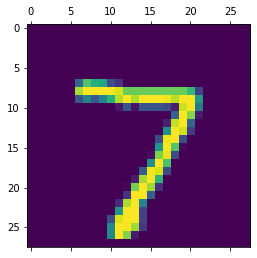

In [18]:
plt.matshow(x_test[0])

In [19]:
y_test[0]

7

In [20]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([2.7342444e-02, 3.0947416e-07, 6.9958702e-02, 9.6504831e-01,
       1.4013374e-03, 9.5183469e-02, 2.2125423e-06, 9.9973917e-01,
       1.2084208e-01, 6.9726545e-01], dtype=float32)

In [21]:
max(y_pred[0])
#Returns the indices of the maximum values along an axis.
np.argmax(y_pred[0])

7

Input Image:  3
Output :  3


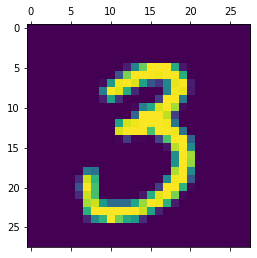

In [22]:
def predict(i):
    print('Input Image: ', y_test[i])
    plt.matshow(x_test[i])
    print('Output : ', np.argmax(y_pred[i]))

predict(90)

#### Cofusion matrix

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:3]

[7, 2, 1]

In [24]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [25]:
#Computes the confusion matrix from predictions and labels.
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  932,   18,    5,    2,   12,    9,   37,    4],
       [   2,    0,   20,  928,    0,   19,    2,   10,   23,    6],
       [   3,    1,    7,    2,  895,    0,   12,    4,   14,   44],
       [  10,    3,    6,   41,    5,  760,   14,    4,   42,    7],
       [  13,    3,    8,    1,    6,    9,  911,    2,    5,    0],
       [   1,    5,   23,    8,    5,    1,    0,  943,    5,   37],
       [   6,    7,    7,   24,    9,   16,    7,   10,  882,    6],
       [  11,    7,    1,   12,   19,    5,    0,   17,    7,  930]])>

Text(69.0, 0.5, 'Truth')

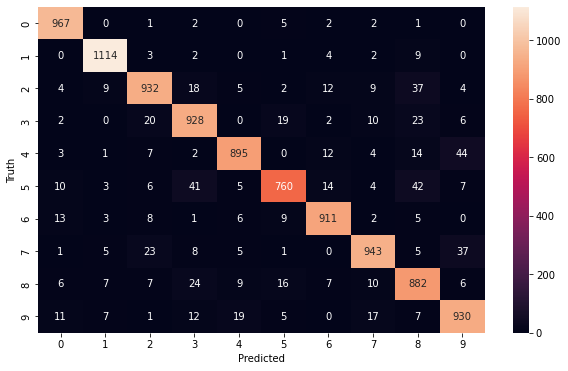

In [26]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding a Hidden Layer to NN

In [27]:
model = keras.Sequential([
    #28*28 input layer and 10 output with a hidden layer contains 100 neurons
    keras.layers.Dense(100, input_shape=(28*28,), activation='relu'),
    #output layer contains 10 output
    keras.layers.Dense(10, activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4823 - accuracy: 0.8440
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3897 - accuracy: 0.9051
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2843 - accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2558 - accuracy: 0.9339
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2314 - accuracy: 0.9400


In [28]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2860 - accuracy: 0.9369


[0.2860097289085388, 0.9369000196456909]

In [29]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred[0]

313/313 [==============================] - 1s 4ms/step


array([0.5933129 , 0.3648734 , 0.5486877 , 0.45999372, 0.4990358 ,
       0.45828378, 0.4527839 , 0.4291927 , 0.70364183, 0.5273401 ],
      dtype=float32)

Text(69.0, 0.5, 'Truth')

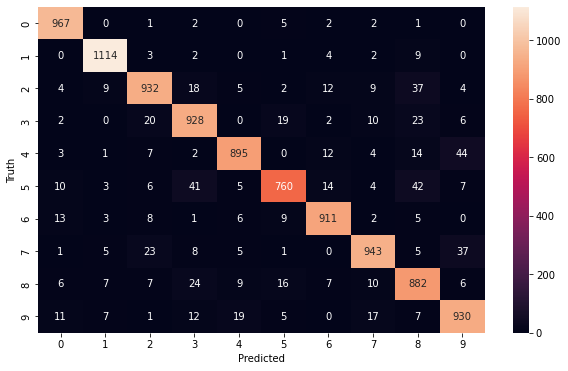

In [30]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_pred_labels)
cm
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#after adding a hidden layer the accuracy improved and the mistakes decressed

### Notes

In [32]:
# Flatten Dense withount needing to converting manualy
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#TensorBoards
tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train , y_train , epochs=5 , callbacks=[tb_callbacks])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 2.5905 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4052 - accuracy: 0.9009
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2694 - accuracy: 0.9314
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2432 - accuracy: 0.9375


In [34]:
%load_ext tensorboard
%tensorboard --logdir logs/fit #or write this last in cmd ' tensorboard --logdir logs/ '

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4744), started 3:12:03 ago. (Use '!kill 4744' to kill it.)